# loading data file

In [1]:
# import relevant module
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
# Get the data.
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

# Get the data.
filename='433440-99999-merge.csv'

#filename='india_all_stations_comma.txt'
series = read_csv( filename, header=0, parse_dates=[0], squeeze=True, date_parser=parser)
    
series=series.dropna(axis=0)
series.head()

/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,YEARMODA,TEMP
0,2000-01-01,76.0
1,2000-01-02,77.1
2,2000-01-03,76.0
3,2000-01-04,77.3
4,2000-01-05,76.9


# Convert Fahrenheit temperature into Celsius

In [2]:
# Select data
series_p=pd.DataFrame(data=series, columns=['YEARMODA','TEMP'])
selected_cols = ['YEARMODA', 'TEMP']
data = series_p[selected_cols]

# Rename columns
name_conversion = {'YEARMODA': 'TIME'}
data = data.rename(columns=name_conversion)

# Convert Fahrenheit temperature into Celsius
data['Celsius'] = (data['TEMP'] - 32) / 1.8
data.head(2)

,TIME,TEMP,Celsius
0,2000-01-01,76.0,24.444444
1,2000-01-02,77.1,25.055556


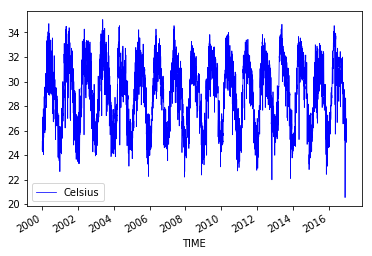

In [3]:
data = data.set_index('TIME')
#data.plot(x='TIME', y='Celsius');
data.plot(x=data.index, y='Celsius', kind='line', lw=0.75, c='b');
plt.savefig("temp_plot1.png", dpi=300)

# pick a season/month over several years

In [4]:
winter = data[data.index.month.isin([12,1,2])]
spring = data[data.index.month.isin([3,4,5])]
summer = data[data.index.month.isin([6,7,8])]
fall   = data[data.index.month.isin([9,10,11])]

# plot a season/month over several years

In [19]:
from matplotlib import dates

yticks = np.arange(start=-25, stop=31, step=5)
for ax in [ax11, ax12, ax21, ax22]:
    # Clear x axis ticks
    ax.get_xaxis().set_ticks([])
    # Specifu y-axis ticks
    ax.yaxis.set_ticks(yticks)
    # Specify major tick-label sizes larger
    ax.tick_params(axis='both', which='major', labelsize=12)


# Iterate over all four axes that we have and apply same procedures to each one of them
for ax in [ax11, ax12, ax21, ax22]:
    # Set minor ticks with day numbers
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
    # Set major ticks with month names
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n%b'))

Min: 15.555555555555554 Max: 40.05555555555555


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


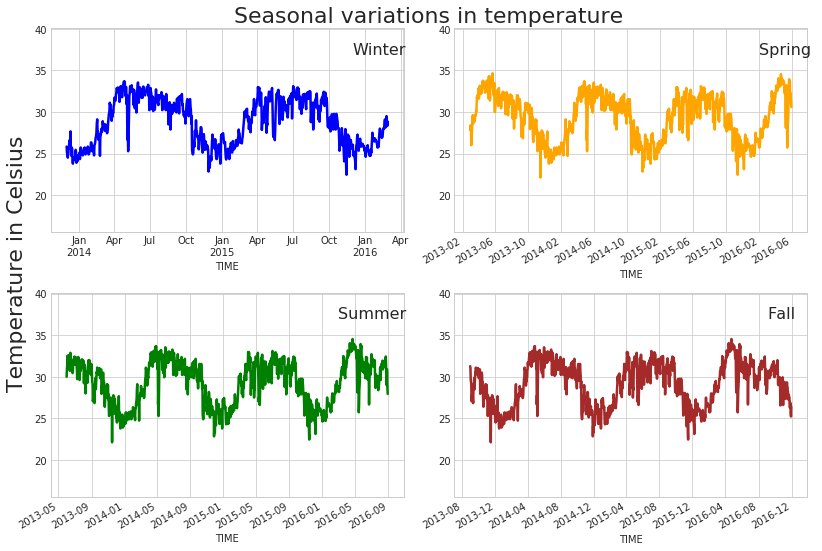

In [6]:
plt.style.use('seaborn-whitegrid')

winter = data['2013-12-01': '2016-02-28']
spring = data['2013-03-01': '2016-05-31']
summer = data['2013-06-01': '2016-08-31']
fall   = data['2013-09-01': '2016-11-30']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]
line_width = 2.5
all_y = 37
min_temp = data['Celsius'].min() - 5
max_temp = data['Celsius'].max() + 5
print("Min:", min_temp, "Max:", max_temp)

fig.add_subplot(111, frameon=False);
  
wint_x = datetime(2015, 12, 1)
spr_x = datetime(2016, 2, 1)
sum_x = datetime(2016, 3, 1)
fal_x = datetime(2016, 9, 1)
ax11.text(wint_x, all_y, 'Winter', size=16);
ax12.text(spr_x, all_y, 'Spring', size=16);
ax21.text(sum_x, all_y, 'Summer', size=16);
ax22.text(fal_x, all_y, 'Fall', size=16);

winter.plot(x=winter.index, y='Celsius',label='winter', ax=ax11, c='blue', legend=False, lw=line_width, ylim=(min_temp, max_temp));
spring.plot(x=spring.index, y='Celsius',label='spring', ax=ax12, c='orange', legend=False, lw=line_width, ylim=(min_temp, max_temp));
summer.plot(x=summer.index, y='Celsius', label='summer',ax=ax21, c='green', legend=False, lw=line_width, ylim=(min_temp, max_temp));
fall.plot(x=fall.index, y='Celsius', label='fall',ax=ax22, c='brown', legend=False, lw=line_width, ylim=(min_temp, max_temp));
#plt.legend(['winter','spring','summer','fall'])

plt.grid('off')
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.ylabel("Temperature in Celsius", size=22, family='Arial');
plt.title("Seasonal variations in temperature", size=22, family='Arial');
plt.tight_layout()
plt.savefig("Temperature_seasons_subplot.png", dpi=300)

# plot parallel time for GA-SARIMA

In [32]:
# Get the data.
filename='time2.csv'
#filename='india_all_stations_comma.txt'
series5 = read_csv( filename,  header=0, index_col=0 )
series5=series5.dropna(axis=0)
#series = series.iloc[:1000,]  # independent variables
print(series5.head(7))
#series.describe()
series4=pd.DataFrame(columns=['generations','population' ,'Time'])
series4[['generations','population' ,'Time']]=series5[['generations','population' , 'Time']]
series4=series4.reset_index(drop=True)
#series5[['AIC']][series5['generations']==100]
#series4[['population']][series4['generations']==100]

       generations  population   (p  d   q)  (P  D  Q    s)         AIC  \
index                                                                     
0               10          10   (0  1   8)  (2  0  2   12) -149.524552   
5               10          50   (1  0   2)  (2  0  2   12) -154.041926   
10              10         100   (0  0   3)  (2  0  2   12) -156.908104   
15              10         200   (1  0   0)  (2  0  2   12) -157.864563   
20              10         300   (1  0   0)  (1  0  1   12) -159.496669   
25              10         400   (1  0   0)  (1  0  1   12) -159.496669   
30              10         500  (11  1   1)  (0  0  1   12) -158.326306   

                Time  
index                 
0        1192.058688  
5        9410.121537  
10      22615.712673  
15      39723.027160  
20      63318.764635  
25     108862.663369  
30     123527.194000  


In [33]:
z1=series5[['AIC']][series5['generations']==100]
for i in [10,20,50,100,200]:
    x1=series4[['population']][series4['generations']==i]
    y1=series4[['Time']][series4['generations']==i]
    z1=series5[['AIC']][series5['generations']==i]
    for label, x, y in zip(z1['AIC'], x1['population'], y1['Time']):
        label1 = "{:.2f}".format(label)
        #print(str(label1),x, y)
        #print('-------------')
#z1[-1:]

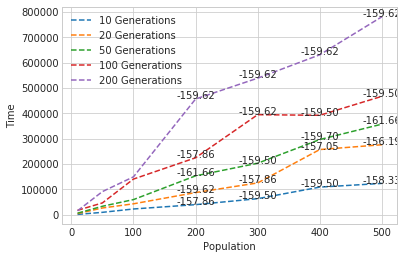

In [35]:
#fig, axes = plt.subplots(nrows=2, ncols=2)
for i in [10,20,50,100,200]:
    x1=series4[['population']][series4['generations']==i]
    y1=series4[['Time']][series4['generations']==i]
    z1=series5[['AIC']][series5['generations']==i]
    plt.plot(x1,y1,'--',label=str(str(i)+' Generations'))

    for label, x, y in zip(z1['AIC'], x1['population'], y1['Time']):
        if x > 100:
            label1 = "{:.2f}".format(label)
            plt.annotate(label1, xy = (x , y ), xytext=(x+0.01 , y+100), fontsize = 10,rotation=0, ha='center',clip_on=True)
    
plt.legend(loc='upper left')
plt.xlabel('Population')
plt.ylabel('Time')
plt.savefig("time_parallel_plot1.png", dpi=600)
plt.show()


# Serial GA-SARIMA

In [2]:
# import relevant module
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import statsmodels.api as sm

%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot

from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error

#preprocess
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

from pandas import Series
plt.style.use('fivethirtyeight')
print ("libraries loaded")

/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


libraries loaded


In [3]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
def norm_series(series):
    y = series.resample('MS').mean()
    values2 = y.values
    values2 = values2.reshape((len(values2), 1))
    # train the normalization
    scaler2 = MinMaxScaler(feature_range=(-1, 1))
    scaler2 = scaler2.fit(values2)
    ser2 = DataFrame(y)
    ser2['normalized']= scaler2.transform(values2)
    ser2['log']=np.log(values2 )
    ser2['loglog']=np.log(np.log(values2 ))
    ser2.head(4)
    return ser2, scaler2

In [4]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

# Get the data.
filename='433440-99999-merge.csv'

#filename='india_all_stations_comma.txt'
series = read_csv( filename, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    
series=series.dropna(axis=0)
#series = series.iloc[:1000,]  # independent variables
print(series.head())
series.describe()

YEARMODA
2000-01-01    76.0
2000-01-02    77.1
2000-01-03    76.0
2000-01-04    77.3
2000-01-05    76.9
Name: TEMP, dtype: float64


count    6201.000000
mean       84.337687
std         4.764565
min        69.000000
25%        80.200000
50%        85.000000
75%        88.300000
max        95.100000
Name: TEMP, dtype: float64

In [5]:
series2,scaler2 =norm_series(series)
series2.head(3)

,TEMP,normalized,log,loglog
YEARMODA,,,,
2000-01-01,77.866667,-0.885479,4.354998,1.471324
2000-02-01,81.332143,-0.418870,4.398541,1.481273
2000-03-01,84.851613,0.055009,4.440904,1.490858


In [6]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import time
from datetime import timedelta

start_time = time.time()

# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
	# define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
    model_fit = model.fit(disp=False)
	# make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    
    return yhat[0], model_fit.aic

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat, aic = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error, aic

# one-step sarima forecast
def sarima_forecasting(history, config):
	order, sorder = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	#yhat = model_fit.predict(len(history), len(history))
    
	return model_fit

# walk-forward validation for univariate data
def test_validation(data, n_test, cfg):
	# step over each time-step in the test set
    model_fit = sarima_forecasting(data, cfg)
    pred = model_fit.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)
    y_forecasted = pred.predicted_mean
    #print ("type(y_forecasted):", type(y_forecasted))
    y_truth = data['2000-01-01':]

    # Compute the mean square error
    mse = ((y_forecasted - y_truth) ** 2).mean()
    error2 = np.sqrt(mean_squared_error(y_forecasted , y_truth))

    #print('Test RMSE: %.3f' % error2)
    #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_fit.aic))
    #print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
	# estimate prediction error
    #error = measure_rmse(test, predictions)
    return mse, error2, model_fit.aic

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
  result = None
  # convert config to a key
  key = str(cfg)
  # show all warnings and fail on exception if debugging
  if debug:
    result, aic = walk_forward_validation(data, n_test, cfg)
  else:
		# one failure during model validation suggests an unstable config
    try:
      # never show warnings when grid searching, too noisy
      with catch_warnings():
        filterwarnings("ignore")
        #result, aic = walk_forward_validation(data, n_test, cfg)
        mse, result, aic = test_validation(data, n_test, cfg)
    except:
      error = None
  # check for an interesting result
  if result is not None:
    print(' > Model[%s] mse=%.4f rmse= %.4f aic= %.3f'  % (key, mse, result, aic))
    #file.write('> Model[%s] mse=%.4f rmse= %.4f aic= %.3f'  % (key, mse, result, aic))
  return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
  models = list()
  p_params = [0, 1, 6, 9]#range(8, 12)
  d_params = [0]
  q_params = [0, 1, 2, 7, 8, 9 ]#range(0, 10)
  P_params = [0, 1, 2]#range(0, 10)
  D_params = [0, 1]
  Q_params = [0, 1, 2]#range(0, 10)
  m_params = seasonal
  for p in p_params:
    for d in d_params:
      for q in q_params:
        for P in P_params:
          for D in D_params:
            for Q in Q_params:
              for m in m_params:
                cfg = [(p,d,q), (P,D,Q,m)]
                models.append(cfg)
  return models

if __name__ == '__main__':
  data = series2['normalized']
  print(data.shape)
  n_test = 2*365
  cfg_list = sarima_configs(seasonal=[12])
  scores = grid_search(data, cfg_list, n_test)
  elapsed_time_secs = time.time() - start_time
  msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
  print(msg) 
  print('done')
  for cfg, error in scores[:3]:
    print(cfg, error)

(204,)
 > Model[[(0, 0, 0), (1, 0, 0, 12)]] mse=0.0577 rmse= 0.2402 aic= -58.448
 > Model[[(0, 0, 0), (0, 0, 1, 12)]] mse=0.1727 rmse= 0.4155 aic= 194.422
 > Model[[(0, 0, 0), (1, 1, 0, 12)]] mse=0.0504 rmse= 0.2244 aic= -93.987
 > Model[[(0, 0, 0), (1, 0, 1, 12)]] mse=0.0424 rmse= 0.2059 aic= -148.177
 > Model[[(0, 0, 0), (0, 0, 2, 12)]] mse=0.1382 rmse= 0.3718 aic= 109.981
 > Model[[(0, 0, 0), (0, 1, 1, 12)]] mse=0.0424 rmse= 0.2059 aic= -141.882
 > Model[[(0, 0, 0), (2, 0, 0, 12)]] mse=0.0537 rmse= 0.2317 aic= -94.794
 > Model[[(0, 0, 0), (1, 0, 2, 12)]] mse=0.0428 rmse= 0.2069 aic= -134.352
 > Model[[(0, 0, 0), (1, 1, 1, 12)]] mse=0.0426 rmse= 0.2063 aic= -138.576
 > Model[[(0, 0, 0), (2, 0, 1, 12)]] mse=0.0427 rmse= 0.2067 aic= -137.456
 > Model[[(0, 0, 0), (2, 1, 0, 12)]] mse=0.0486 rmse= 0.2205 aic= -107.233
 > Model[[(0, 0, 0), (0, 1, 2, 12)]] mse=0.0428 rmse= 0.2069 aic= -129.896
 > Model[[(0, 0, 0), (2, 1, 1, 12)]] mse=0.0438 rmse= 0.2093 aic= -124.911
 > Model[[(0, 0, 0), (2

 > Model[[(6, 0, 1), (0, 0, 0, 12)]] mse=0.0481 rmse= 0.2194 aic= -46.233
 > Model[[(6, 0, 1), (0, 0, 1, 12)]] mse=0.0476 rmse= 0.2183 aic= -42.270
 > Model[[(0, 0, 2), (2, 0, 2, 12)]] mse=0.0526 rmse= 0.2293 aic= -156.104
 > Model[[(6, 0, 7), (0, 1, 0, 12)]] mse=0.0478 rmse= 0.2185 aic= -88.869
 > Model[[(0, 0, 2), (2, 1, 0, 12)]] mse=0.0475 rmse= 0.2178 aic= -111.238
 > Model[[(0, 0, 7), (2, 1, 1, 12)]] mse=0.0414 rmse= 0.2034 aic= -130.935
 > Model[[(6, 0, 1), (0, 0, 2, 12)]] mse=0.0468 rmse= 0.2164 aic= -43.199
 > Model[[(6, 0, 1), (0, 1, 0, 12)]] mse=0.0554 rmse= 0.2354 aic= -48.748
 > Model[[(6, 0, 9), (1, 0, 2, 12)]] mse=0.0525 rmse= 0.2291 aic= -109.411
 > Model[[(0, 0, 2), (2, 1, 1, 12)]] mse=0.0425 rmse= 0.2062 aic= -132.691
 > Model[[(1, 0, 2), (2, 1, 2, 12)]] mse=0.0383 rmse= 0.1957 aic= -143.361
 > Model[[(1, 0, 7), (0, 0, 0, 12)]] mse=0.0649 rmse= 0.2548 aic= 23.888
 > Model[[(0, 0, 9), (2, 1, 2, 12)]] mse=0.0428 rmse= 0.2070 aic= -139.272
 > Model[[(6, 0, 1), (0, 1, 1, 1

 > Model[[(6, 0, 9), (2, 0, 1, 12)]] mse=0.0468 rmse= 0.2163 aic= -117.594
 > Model[[(0, 0, 8), (1, 1, 2, 12)]] mse=0.0430 rmse= 0.2074 aic= -143.867
 > Model[[(1, 0, 7), (2, 0, 0, 12)]] mse=0.0715 rmse= 0.2673 aic= -101.775
 > Model[[(6, 0, 1), (2, 1, 1, 12)]] mse=0.0414 rmse= 0.2034 aic= -129.157
 > Model[[(0, 0, 8), (2, 0, 0, 12)]] mse=0.0510 rmse= 0.2257 aic= -100.033
 > Model[[(0, 0, 8), (2, 0, 1, 12)]] mse=0.0409 rmse= 0.2023 aic= -139.828
 > Model[[(1, 0, 7), (2, 0, 1, 12)]] mse=0.0454 rmse= 0.2131 aic= -138.033
 > Model[[(1, 0, 8), (2, 1, 2, 12)]] mse=0.0418 rmse= 0.2044 aic= -140.104
 > Model[[(1, 0, 9), (0, 0, 0, 12)]] mse=0.0621 rmse= 0.2492 aic= 17.812
 > Model[[(1, 0, 9), (0, 0, 1, 12)]] mse=0.0628 rmse= 0.2507 aic= 4.773
 > Model[[(1, 0, 7), (2, 0, 2, 12)]] mse=0.0378 rmse= 0.1944 aic= -152.365
 > Model[[(6, 0, 9), (2, 0, 2, 12)]] mse=0.0450 rmse= 0.2121 aic= -126.445
 > Model[[(9, 0, 7), (2, 1, 1, 12)]] mse=0.0409 rmse= 0.2023 aic= -123.286
 > Model[[(9, 0, 1), (2, 1, 1,

 > Model[[(9, 0, 8), (1, 0, 1, 12)]] mse=0.0420 rmse= 0.2051 aic= -128.844
 > Model[[(6, 0, 8), (0, 1, 0, 12)]] mse=0.0434 rmse= 0.2082 aic= -93.319
 > Model[[(1, 0, 9), (2, 0, 2, 12)]] mse=0.0373 rmse= 0.1932 aic= -144.610
 > Model[[(9, 0, 2), (2, 0, 1, 12)]] mse=0.0438 rmse= 0.2092 aic= -127.110
 > Model[[(9, 0, 0), (1, 1, 2, 12)]] mse=0.0421 rmse= 0.2052 aic= -150.471
 > Model[[(1, 0, 9), (2, 1, 0, 12)]] mse=0.0535 rmse= 0.2313 aic= -102.866
 > Model[[(9, 0, 0), (2, 0, 0, 12)]] mse=0.0471 rmse= 0.2170 aic= -97.548
 > Model[[(6, 0, 8), (0, 1, 1, 12)]] mse=0.0423 rmse= 0.2056 aic= -146.675
 > Model[[(9, 0, 8), (1, 0, 2, 12)]] mse=0.0445 rmse= 0.2110 aic= -115.573
 > Model[[(9, 0, 2), (2, 0, 2, 12)]] mse=0.0603 rmse= 0.2457 aic= -145.529
 > Model[[(9, 0, 0), (2, 0, 1, 12)]] mse=0.0411 rmse= 0.2027 aic= -131.232
 > Model[[(1, 0, 9), (2, 1, 1, 12)]] mse=0.0499 rmse= 0.2234 aic= -127.183
 > Model[[(9, 0, 8), (1, 1, 0, 12)]] mse=0.0419 rmse= 0.2047 aic= -109.852
 > Model[[(9, 0, 0), (2, 0,

# 2.4.3 SARIMA model

In [6]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
def norm_series(series):
    y = series.resample('MS').mean()
    values2 = y.values
    values2 = values2.reshape((len(values2), 1))
    # train the normalization
    scaler2 = MinMaxScaler(feature_range=(-1, 1))
    scaler2 = scaler2.fit(values2)
    ser2 = DataFrame(y)
    ser2['normalized']= scaler2.transform(values2)
    ser2['log']=np.log(values2 )
    ser2['loglog']=np.log(np.log(values2 ))
    ser2.head(4)
    return ser2, scaler2

In [7]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

# Get the data.
filename='433440-99999-merge.csv'

#filename='india_all_stations_comma.txt'
series = read_csv( filename, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    
series=series.dropna(axis=0)
#series = series.iloc[:1000,]  # independent variables
print(series.head())
series.describe()

YEARMODA
2000-01-01    76.0
2000-01-02    77.1
2000-01-03    76.0
2000-01-04    77.3
2000-01-05    76.9
Name: TEMP, dtype: float64


count    6201.000000
mean       84.337687
std         4.764565
min        69.000000
25%        80.200000
50%        85.000000
75%        88.300000
max        95.100000
Name: TEMP, dtype: float64

In [8]:
index_min, index_max = np.argmin(series), np.argmax(series)
index_min, index_max 

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


(Timestamp('2016-12-01 00:00:00'), Timestamp('2003-05-20 00:00:00'))

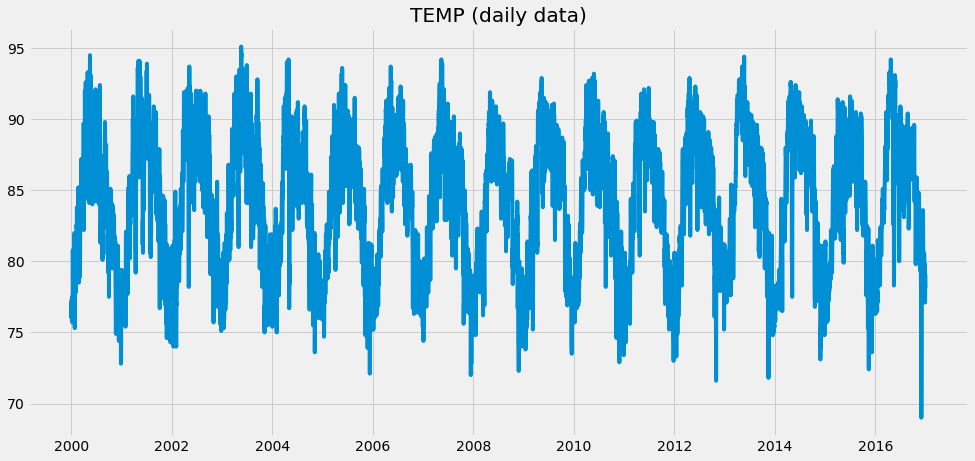

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(series)
plt.title('TEMP (daily data)')
plt.grid(True)
plt.show()

In [11]:
series2,scaler2 =norm_series(series)
series2.head(3)

,TEMP,normalized,log,loglog
YEARMODA,,,,
2000-01-01,77.866667,-0.885479,4.354998,1.471324
2000-02-01,81.332143,-0.418870,4.398541,1.481273
2000-03-01,84.851613,0.055009,4.440904,1.490858


-----------normalized--------------------------


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


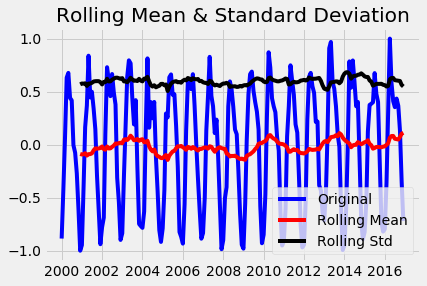

Results of Dickey-Fuller Test:
Test Statistic                  -2.636872
p-value                          0.085613
#Lags Used                      14.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64
---------------------------------------


In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
for i in ['normalized']:
    #print("---------------------------------------")
    print("-----------%s--------------------------"%i)
    test_stationarity(series2[i])
    print("---------------------------------------")

In [ ]:
# hourly PM2.5 series
def adfullertest(series):
    useful_values_raw = adfuller(series, autolag = 'AIC')[:5]
    useful_values = [v for v in useful_values_raw[:4]]
    useful_values.extend([useful_values_raw[4]['1%'], useful_values_raw[4]['5%'], useful_values_raw[4]['10%']])
    x=pd.DataFrame({'Label':['Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%'], 'Value':useful_values})
    print(x)

#for i in ['TEMP' ,'normalized','log','loglog']:
for i in ['normalized']:
    #print("---------------------------------------")
    print("-----------%s--------------------------"%i)
    adfullertest(series2[i])
    print("---------------------------------------")

In [ ]:
# daily PM2.5 data for Beijing

fig = plt.figure(figsize=(18,15));
fig.suptitle('ACF and PACF plots for daily data');

ax1 = fig.add_subplot(221)
plot_acf(series, ax=ax1, color='blue');
ax1.set_xlabel('Lags (days)');

ax2 = fig.add_subplot(222)
plot_acf(series,lags=32, ax=ax2, title='Autocorrelation for lags of 32 days', color='blue');
ax2.set_xlabel('Lags (days)');

ax3 = fig.add_subplot(223)
plot_pacf(series, lags=400, ax=ax3, title='Partial Autocorrelation for lags of 365 days (1 year)', color='blue');
ax3.set_xlabel('Lags (days)');

ax4 = fig.add_subplot(224)
plot_pacf(series, lags=32, ax=ax4, title='Partial Autocorrelation for lags of 32 days', color='blue');
ax4.set_xlabel('Lags (days)');

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
for i in ['normalized']:
    plt.title(i,fontsize=24)
    #ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(series2[i], lags=12)#, ax=ax1)
    #ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(series2[i], lags=12)#, ax=ax2)
    plt.show()

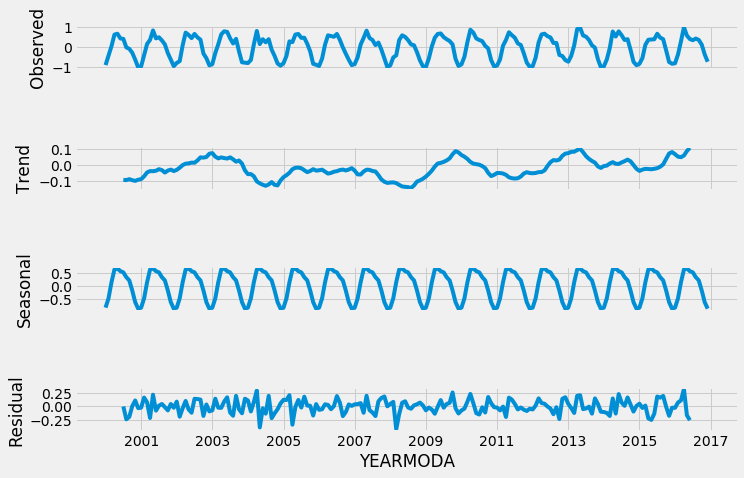

In [13]:
# decomposition
decomposition = seasonal_decompose(series2['normalized'], freq=12) # freq = 1 year
fig = decomposition.plot()
fig.set_size_inches(12, 8);

In [10]:
# train test split for daily PM2.5 data
series_daily_train = series2['normalized'].loc['2000':'2014']
series_daily_test  = series2['normalized'].loc['2014':]
print(len(series_daily_train),len(series_daily_test))

180 36


In [13]:
# use p=1, d=0, q=1 and P=0, D=1, Q=0, s=365 for constructing the Seasonal ARIMA model based on all the above analysis
sarima = SARIMAX(series2['normalized'], order=(6,0,8), seasonal_order=(2,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
sarima_fit = sarima.fit()
print(sarima_fit.summary());
#sarima_fit.plot_diagnostics(figsize=(16,10));
prediction = pd.Series(sarima_fit.forecast(steps=len(series_daily_test)))
prediction.index = series_daily_test.index

# compare the first 15 predicted values
comparison = pd.DataFrame({'actual':series_daily_test,'predict':prediction})
print(comparison.head(15))

/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         normalized   No. Observations:                  204
Model:             SARIMAX(6, 0, 8)x(2, 1, 0, 12)   Log Likelihood                  73.043
Date:                            Thu, 25 Apr 2019   AIC                           -112.086
Time:                                    22:17:30   BIC                            -55.678
Sample:                                01-01-2000   HQIC                           -89.268
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0813   8.68e+06   9.37e-09      1.000    -1.7e+07     1.7e+07
ar.L2         -0.4530    7.5e+06  -

In [14]:
import statsmodels.tsa.statespace.sarimax.SARIMAXResults.pvalues as pvalues
print(sarima_fit.pvalues)

ModuleNotFoundError: No module named 'statsmodels.tsa.statespace.sarimax.SARIMAXResults'; 'statsmodels.tsa.statespace.sarimax' is not a package

In [101]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(prediction, series_daily_test)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


{'mape': 1.1014298559191835,
 'me': 0.017036546941095784,
 'mae': 0.4168970090982905,
 'mpe': -1.0789912748078543,
 'rmse': 0.47299509529949424,
 'corr': 0.5990583608177049,
 'minmax': inf}

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(sarima_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Comparison between train and test

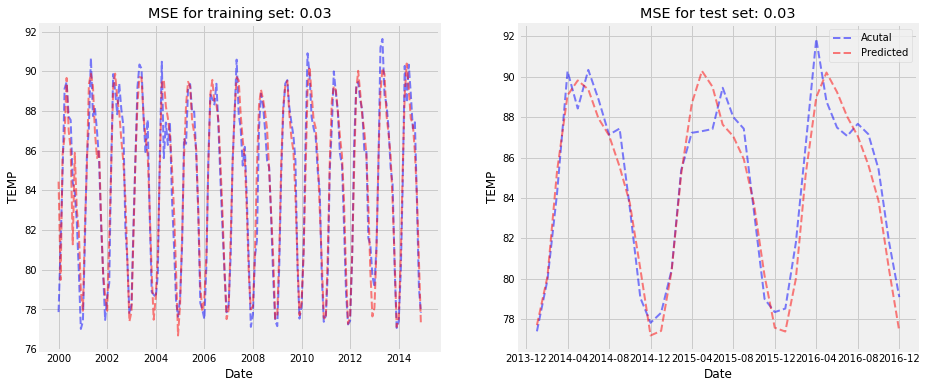

In [131]:

series_daily_train1=pd.DataFrame([i[0] for i in scaler2.inverse_transform(series_daily_train.values.reshape(-1, 1))], 
                                 index= series_daily_train.index)

fittedvalues1=pd.DataFrame([i[0] for i in scaler2.inverse_transform(sarima_fit.fittedvalues.values.reshape(-1, 1))], 
                           index= sarima_fit.fittedvalues.index)

series_daily_test1=pd.DataFrame([i[0] for i in scaler2.inverse_transform(series_daily_test.values.reshape(-1, 1))],
                               index= series_daily_test.index)

prediction1=pd.DataFrame([i[0] for i in scaler2.inverse_transform(prediction.values.reshape(-1, 1))], 
                index= prediction.index)

# plot the results for comparison
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121) # plot the training set
ax1.plot(series_daily_train1, color='blue',linestyle='--',linewidth=2, markersize=12, alpha=0.5);
ax1.plot(fittedvalues1, color='red',linestyle='--',linewidth=2, markersize=12,alpha=0.5);
ax1.set_title('MSE for training set: {:.2f}'.format(mean_squared_error(series_daily_train, sarima_fit.fittedvalues)));
ax1.set_xlabel('Date')
ax1.set_ylabel('TEMP')

ax2 = fig.add_subplot(122) # plot the test set
ax2.plot(series_daily_test1, color='blue',linestyle='--',linewidth=2, markersize=12,alpha=0.5);
ax2.plot(prediction1, color='red',linestyle='--',linewidth=2, markersize=12,alpha=0.5);
ax2.set_title('MSE for test set: {:.2f}'.format(mean_squared_error(series_daily_test, prediction)));
ax2.set_xlabel('Date')
ax2.set_ylabel('TEMP')
plt.legend(['Acutal','Predicted'])

fig.savefig('Train_Test.pdf',bbox_inches='tight')

In [ ]:
#You can also get a DataFrame of 95% confidence intervals with 
pred = sarima_fit.get_prediction(start = 180, end = 250, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05)
pred_ci

# Comparison between actual,    predict,  lower, upper

In [ ]:
pred = sarima_fit.get_prediction(start = 180, end = 290, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05)
pred_ci

#prediction = pd.Series(sarima_fit.forecast(steps=len(series_daily_test)))
prediction.index = series_daily_test.index
# compare the first 15 predicted values
lower=[round(i[0],4) for i in scaler2.inverse_transform(pred_ci['lower normalized'].reshape(-1, 1))]
upper=[round(i[0],4) for i in scaler2.inverse_transform(pred_ci['upper normalized'].reshape(-1, 1))]

pred2=[round(i[0],4) for i in scaler2.inverse_transform(pred.predicted_mean.reshape(-1, 1))]

comparison = pd.DataFrame({'predict':pred2,'lower': lower,'upper':upper},index= pred.predicted_mean.index)
comparison.to_csv('predict_SARIMA.csv', sep=',', encoding='utf-8', mode='a', header=True)

In [ ]:
pred = sarima_fit.get_prediction(start = 180, end = 290, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05)
pred_ci

#prediction = pd.Series(sarima_fit.forecast(steps=len(series_daily_test)))
prediction.index = series_daily_test.index
# compare the first 15 predicted values
lower=[round(i[0],4) for i in scaler2.inverse_transform(pred_ci['lower normalized'].reshape(-1, 1))[0:24]]
upper=[round(i[0],4) for i in scaler2.inverse_transform(pred_ci['upper normalized'].reshape(-1, 1))[0:24]]

test2=[round(i[0],4) for i in scaler2.inverse_transform(series_daily_test.reshape(-1, 1))[12:]]
pred2=[round(i[0],4) for i in scaler2.inverse_transform(pred.predicted_mean.reshape(-1, 1))[0:24]]

comparison2 = pd.DataFrame({'actual':test2,'predict':pred2,'lower': lower,'upper':upper},index= series_daily_test[12:].index)
comparison2.head(15)
comparison2.to_csv('predict_actual_SARIMA.csv', sep=',', encoding='utf-8', mode='a', header=True)

In [42]:
#preds, stderr, ci = sarima_fit.forecast(steps=len(series_daily_test))
#sarima_fit.plot_diagnostics(figsize=(16,10));
prediction = pd.Series(sarima_fit.forecast(steps=len(series_daily_test)))
prediction.index = series_daily_test.index
# compare the first 15 predicted values
test2=[i[0] for i in scaler2.inverse_transform(series_daily_test.reshape(-1, 1))]
pred2=[i[0] for i in scaler2.inverse_transform(prediction.reshape(-1, 1))]

comparison = pd.DataFrame({'actual':test2,'predict':pred2}, index= series_daily_test.index)
print(comparison.head(15))

               actual    predict
YEARMODA                        
2014-01-01  77.403226  77.706478
2014-02-01  79.950000  80.111397
2014-03-01  84.196774  85.304874
2014-04-01  90.276667  89.080345
2014-05-01  88.429032  89.818648
2014-06-01  90.340000  89.373862
2014-07-01  88.883871  87.937072
2014-08-01  87.132258  87.098051
2014-09-01  87.436667  85.552107
2014-10-01  83.512903  83.758082
2014-11-01  79.060000  80.488203
2014-12-01  77.825806  77.198018
2015-01-01  78.322581  77.425857
2015-02-01  80.450000  80.409594
2015-03-01  85.377419  85.184187


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


# plot_diagnostics

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


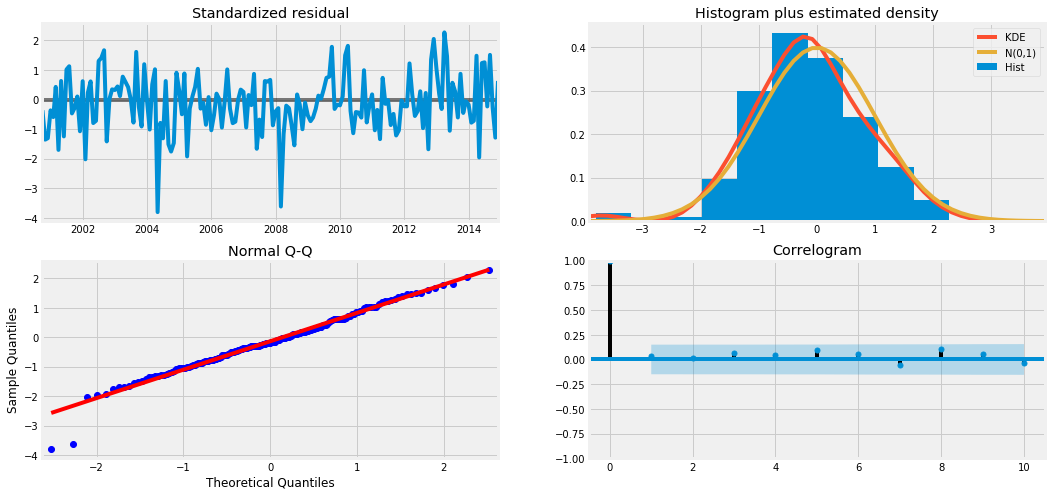

In [43]:
sarima_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

# One-step ahead Forecast, 95% confidence

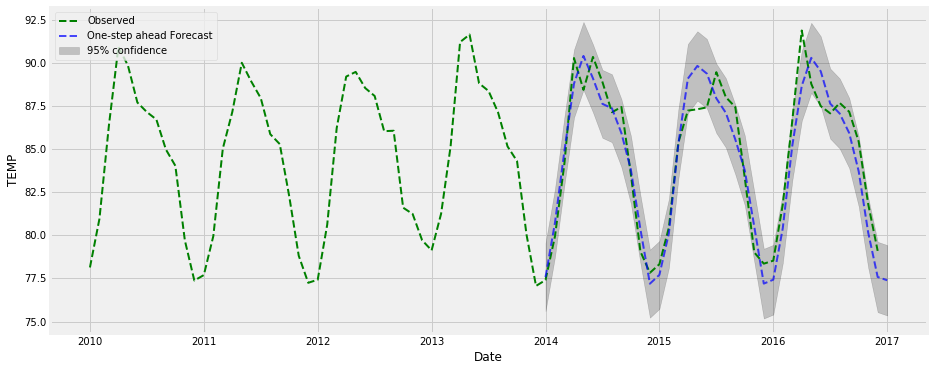

In [138]:
pred = sarima_fit.get_prediction(start=pd.to_datetime('2014-01-01'), end= pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()

#plt.figure(figsize=(14, 7))

xm=pd.DataFrame([i[0] for i in scaler2.inverse_transform(series2['normalized']['2010':].values.reshape(-1, 1))], index= series2['normalized']['2010':].index)

ym=pd.DataFrame([i[0] for i in scaler2.inverse_transform(pred.predicted_mean.values.reshape(-1, 1))], index= pred_ci.index)

lower=pd.Series([i[0] for i in scaler2.inverse_transform(pred_ci['lower normalized'].values.reshape(-1, 1))], index= pred_ci.index)
upper=pd.Series([i[0] for i in scaler2.inverse_transform(pred_ci['upper normalized'].values.reshape(-1, 1))], index= pred_ci.index)

ax = xm.plot(label='Observed',linestyle='--',linewidth=2, markersize=12, color='g')
ym.plot(ax=ax, label='One-step ahead Forecast',linestyle='--',linewidth=2, markersize=12, 
                         alpha=.7, figsize=(14, 6), color='b')

ax.fill_between(pred_ci.index, lower,  upper, color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('TEMP')
plt.legend(['Observed','One-step ahead Forecast','95% confidence'])
plt.savefig('One-step_ahead_Forecast.pdf',bbox_inches='tight')

plt.show()

# long time Forecast 2023, 95% confidence

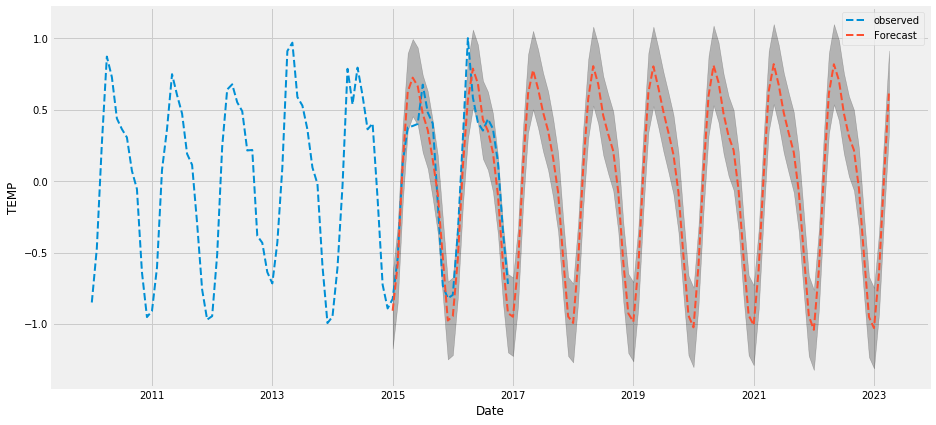

In [118]:
pred_uc = sarima_fit.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = series2['normalized']['2010':].plot(label='observed', figsize=(14, 7),linestyle='--',linewidth=2, markersize=12)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast',linestyle='--',linewidth=2, markersize=12)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('TEMP')

plt.legend()
plt.show()

In [68]:
from matplotlib.backends.backend_pdf import PdfPages

<Figure size 864x432 with 0 Axes>

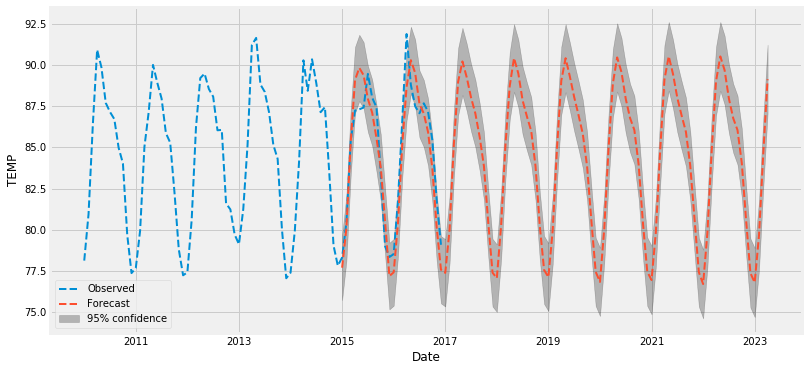

In [119]:
pred_uc = sarima_fit.get_forecast(steps=100)
pred_ci = pred_uc.conf_int(alpha=0.05)

#plt.figure(figsize=(14, 7))

xm=pd.DataFrame([i[0] for i in scaler2.inverse_transform(series2['normalized']['2010':].values.reshape(-1, 1))], index= series2['normalized']['2010':].index)

ym=pd.DataFrame([i[0] for i in scaler2.inverse_transform(pred_uc.predicted_mean.values.reshape(-1, 1))], index= pred_ci.index)

lower=pd.Series([i[0] for i in scaler2.inverse_transform(pred_ci['lower normalized'].values.reshape(-1, 1))], index= pred_ci.index)
upper=pd.Series([i[0] for i in scaler2.inverse_transform(pred_ci['upper normalized'].values.reshape(-1, 1))], index= pred_ci.index)




with PdfPages('Forecast.pdf') as pdf:
    plt.figure(figsize=(12, 6))
    ax = xm.plot(label='observed', figsize=(12, 6),linestyle='--',linewidth=2, markersize=12)
    ym.plot(ax=ax, label='Forecast',linestyle='--',linewidth=2, markersize=12)
    ax.fill_between(pred_ci.index, lower, upper,  label='95% confidence', color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('TEMP')
    plt.legend(['Observed','Forecast','95% confidence'])
    #plt.title('Forecast')
    plt.savefig('Forecast1.pdf',bbox_inches='tight')
    #pdf.savefig(plt,bbox_inches='tight')  # saves the current figure into a pdf page
    plt.show()
    plt.close()



# Mean Squared Error

In [101]:
y_forecasted = pred.predicted_mean
y_truth = series2['normalized']['2010-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.02


In [ ]:
order=(1,0,0)
seasonal_order=(1,0,1,12)
pred = sarima_fit.get_prediction(start=pd.to_datetime('2010-01-01'), dynamic=False)
y_forecasted = pred.predicted_mean
#print ("type(y_forecasted):", type(y_forecasted))
y_truth = series2['normalized']['2010-01-01':'2014-12-01']
            
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
error = np.sqrt(mean_squared_error(y_forecasted , y_truth))
            
print('Test RMSE: %.3f' % error)
print('ARIMA{}x{}12 - AIC:{}'.format(order, seasonal_order, sarima_fit.aic))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# Simole SARIMAX model

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

#http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

minResult = []
minParam = []
minParam_Seasonal = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series2['normalized'], order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            minResult.append( results.aic )
            minParam.append(param)
            minParam_Seasonal.append(param_seasonal)
                    
            pred = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)
            y_forecasted = pred.predicted_mean
            #print ("type(y_forecasted):", type(y_forecasted))
            y_truth = series2['normalized']['2000-01-01':]

            # Compute the mean square error
            mse = ((y_forecasted - y_truth) ** 2).mean()
            error = np.sqrt(mean_squared_error(y_forecasted , y_truth))

            print('Test RMSE: %.3f' % error)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            #if mean squared error were zero, prediction would be perfect.
        except:
            #NB: some parameter combinations might result in errors. catch errors and continue.
            continue
print ("end-----")
print (min(minResult))

In [ ]:
index = minResult.index(min(minResult))
print (index)

print ("Minimum AIC value ", min(minResult), " occurs with SARIMAX(", minParam[index], ", ", minParam_Seasonal[index], ")" )
#redo the model using the optimum input parameters.
mod = sm.tsa.statespace.SARIMAX(y, order=(minParam[index]), seasonal_order=(minParam_Seasonal[index]),
                                enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()

print(results.summary())

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
y_forecasted = pred.predicted_mean
#print ("type(y_forecasted):", type(y_forecasted))
y_truth = y['2014-01-01':]
            
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
error = np.sqrt(mean_squared_error(y_forecasted , y_truth))
            
print('Test RMSE: %.3f' % error)
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

In [ ]:
series2['TEMP'].plot(figsize=(12,8))
pyplot.show()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series2['TEMP'].values.squeeze(), lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series2['TEMP'], lags=12, ax=ax2)
pyplot.show()

In [ ]:
autocorrelation_plot(series2['TEMP'])
pyplot.show()

In [ ]:
from pandas import DataFrame
from scipy import stats

residuals8 = DataFrame(series2['TEMP'])
residuals8.plot(kind='line')
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, freq=12, model='additive')
fig = decomposition.plot()
plt.show()
#print ("plotted")

In [ ]:
#arma_mod20 = sm.tsa.ARMA(series, (5,1,0)).fit(disp=False)
arma_mod20 = sm.tsa.ARMA(series2['log'], (12,1,0)).fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)
print(arma_mod20.summary())

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_mod20.plot_predict(start='2012-06-01', end='2016-05-01',  dynamic=False, ax=ax)
legend = ax.legend(loc='upper left')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = series2['log'].loc['2010':].plot(ax=ax)
fig = arma_mod20.plot_predict(start='2012-06-01', end='2019-05-01', dynamic=False, ax=ax, plot_insample=True)
plt.show()

In [ ]:
from pandas import DataFrame
# fit model
model = ARIMA(series2['log'], order=(11,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())